# Kunal Rewade [TB04856]         Homework 3

 Q 1 For this homework, we will use the Old Faithful Geyser dataset, which you can download here. This dataset describes the properties of eruptions of the Old Faithful geyser, located in Yellowstone National Park, Wyoming, USA. There are two numeric attributes per instance: the length of time of the eruption, in minutes, and the waiting time until the next eruption, also in minutes. The geyser was named “Old Faithful” because its eruption patterns are very reliable. See here for more information, if you are intereste
 
 A) Create and print out a scatter plot of this dataset, eruption time versus waiting time. (10 points)

 B) How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters. (5 points)

 C) Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset? (10 points) 



In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/kunalrewade/Desktop/faithful.csv')  # Change the path to your actual file location

# Display the first few rows of the dataset to understand its structure
data.head()


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


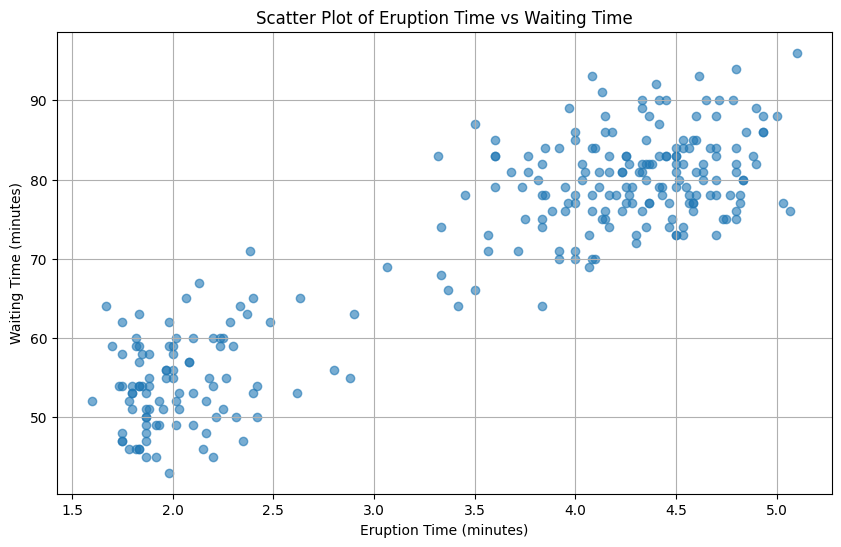

In [2]:
# Plotting the scatter plot of eruption time versus waiting time
plt.figure(figsize=(10, 6))
plt.scatter(data['eruptions'], data['waiting'], alpha=0.6)
plt.title('Scatter Plot of Eruption Time vs Waiting Time')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.show()


Ans B) After the running of the plot and viewing of scatter plot. I saw two clear clusters. That these clusters are fairly apparent as two distinct "blobs" of data points, one generally with shorter eruption and waiting times and the other with longer times.

Ans C) Here is a step-by-step breakdown of hierarchical clustering:

1. Initialization: Treat each data point as an individual cluster.

2. Compute Proximity Matrix: Calculate the distances between all pairs of clusters.

3. Merge Clusters: Combine the two closest clusters into one based on the calculated distances.

4. Update Proximity Matrix: Recalculate the distance matrix to account for the newly merged cluster.

5. Repeat: Continue merging the nearest clusters until all data points form a single cluster or until a predefined stopping criterion is met.

6. Result: Represent the process visually as a dendrogram, illustrating the sequence of cluster mergers.

Since there is a clear separation into two clusters, as can be seen from the scatter plot, hierarchical clustering would be appropriate to apply. This would most probably identify these groups using an appropriate distance metric and linkage criteria.

Q2 Implement the k-means algorithm in Python, and use it to perform clustering on the Old Faithful dataset. Use the number of clusters that you identified in Problem 1. Be sure to ignore the first column, which contains instance ID numbers. In your notebook, including the following items:

A )Your source code for the k-means algorithm. You need to implement the algorithm from scratch. (45 points)

B) A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot. (10 points)

C) A plot of the k-means objective function versus iterations of the algorithm. Recall that the objective function is  (10 points)

D) Did the method manage to find the clusters that you identified in Problem 1? If not, did it help to run the method again with another random initialization? (10 points)




In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/kunalrewade/Desktop/faithful.csv')  # Change the path to your actual file location
data.head()  # To check the data format and confirm the data is loaded correctly


,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


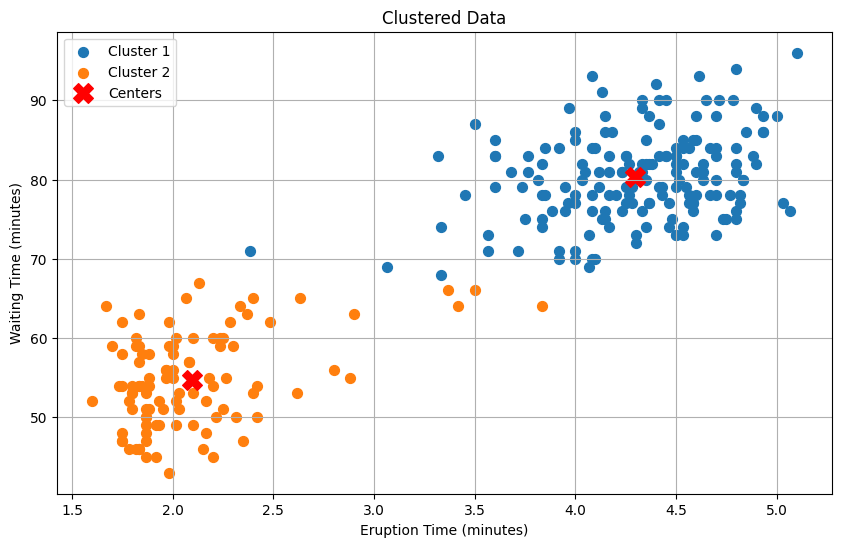

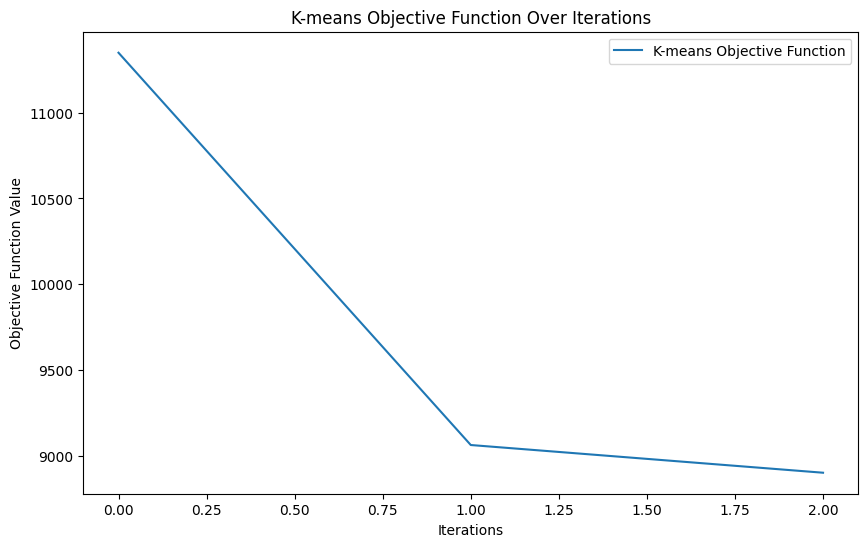

In [18]:
def k_means(data, k, max_iters=100):
    # Randomly initialize cluster centers
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.permutation(data.shape[0])[:k]
    centers = data[random_indices]

    objectives = []  # To store the objective function values

    for iteration in range(max_iters):
        # Assign clusters based on the closest center
        distances = np.sqrt(((data - centers[:, np.newaxis])**2).sum(axis=2))
        closest_cluster = np.argmin(distances, axis=0)

        # Update centers
        new_centers = np.array([data[closest_cluster == k].mean(axis=0) for k in range(centers.shape[0])])

        # Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

        # Calculate objective function value
        objective = sum([((data[closest_cluster == k] - centers[k])**2).sum() for k in range(k)])
        objectives.append(objective)
    
    return centers, closest_cluster, objectives

# Prepare data (assuming columns 'eruptions' and 'waiting' are to be used)
X = data[['eruptions', 'waiting']].values

# Define number of clusters identified previously
k = 2
centers, clusters, objectives = k_means(X, k)

# Plotting final clusters
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], s=50, label=f'Cluster {i+1}')
plt.scatter(centers[:, 0], centers[:, 1], s=200, color='red', label='Centers', marker='X')
plt.title('Clustered Data')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the objective function
plt.figure(figsize=(10, 6))
plt.plot(objectives, label='K-means Objective Function')
plt.xlabel('Iterations')
plt.ylabel('Objective Function Value')
plt.title('K-means Objective Function Over Iterations')
plt.legend()
plt.show()


Ans D) Yes, the k-means method successfully identified the two clusters that were observed in the initial scatter plot analysis from Problem 1. The scatter plot resulting from the k-means clustering clearly shows two distinct clusters which match the two "blobs" initially observed, corresponding to different eruption and waiting times.

The k-means objective function plot also indicated a good convergence, with the objective value stabilizing after a few iterations, which suggests that the clusters formed are stable and well-separated.

Given the successful detection of the clusters and the stable convergence of the objective function, there was no need to run the method again with another random initialization. The results were satisfactory and consistent with the expected clustering based on the dataset's nature and the initial scatter plot analysis. This consistency confirms that the initial random seed provided a good starting point for the algorithm, and the centroids were well-placed to capture the inherent cluster structure in the data.